In [37]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

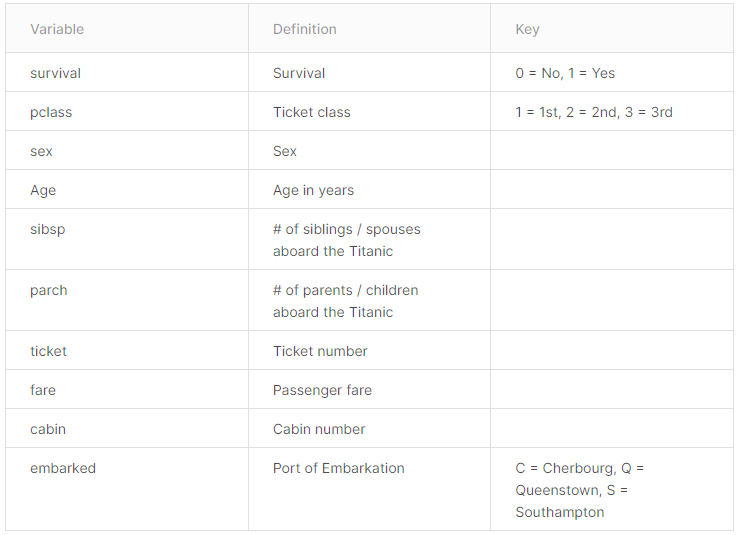

# Импорт

In [38]:
# Импорт данных
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

In [39]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
# Смотрим пропуски
# Трейн
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
# Тест
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Довольно много пропущенных значений для поля Age, заполнять медианным значением сильно исказит результаты. Удалить все поля с этими пропусками большая потеря тестового множества. Попробуем удалить фичу.

PassengerId, Cabin, Name, Ticket - бессмысленные для анализа фичи - удалим

SibSp, Parch - возможно тоже, но потом

Оставшиеся пропущенные значения удалим


In [42]:
# Очистка
for_drop = ['PassengerId', 'Cabin', 'Name', 'Ticket', 'Age']
train_df_clear = train_df.drop(for_drop, axis=1)
test_df_clear = test_df.drop(for_drop, axis=1)

train_df_clear.dropna(inplace=True)

In [43]:
# Проверка
train_df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [44]:
test_df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


# Features enginering

In [45]:
# Колонки с категареальными значениями
cat_col = ['Pclass', 'Sex', 'Embarked']

In [46]:
train_df_clear[cat_col] = train_df_clear[cat_col].astype('category')
test_df_clear[cat_col] = test_df_clear[cat_col].astype('category')

In [47]:
train_df_clear.dtypes

Survived       int64
Pclass      category
Sex         category
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [48]:
# X и y
X = pd.get_dummies(train_df_clear.drop('Survived', axis=1), drop_first=1)
y = train_df_clear.Survived

In [14]:
X

,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,7.2500,0,1,1,0,1
1,1,0,71.2833,0,0,0,0,0
2,0,0,7.9250,0,1,0,0,1
3,1,0,53.1000,0,0,0,0,1
4,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,0,0,13.0000,1,0,1,0,1
887,0,0,30.0000,0,0,0,0,1
888,1,2,23.4500,0,1,0,0,1
889,0,0,30.0000,0,0,1,0,0


# XGBoost

Метрика - roc-auc

Делить на тестовую и обучающую не будем, т.к. обучение проводится с помощью кросс-валидации

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
import numpy as np
from xgboost import XGBClassifier;

In [16]:
# Соотношение классов для параметра scale_pos_weight
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [17]:
scale_pos_weight = y.value_counts()[0]/y.value_counts()[1]
scale_pos_weight

1.6147058823529412

In [18]:
# Параметры
cv = StratifiedKFold(n_splits=5, shuffle=True)
param_grid = {
    'n_estimators'     : [150, 300, 500, 750],
    'learning_rate'    : [0.05, 0.1, 0.2], 
    'min_child_weight' : [0.3, 0.5, 1, 2], 
    'gamma'            : [0, 0.3, 0.5, 1, 5],
    'max_depth'        : [3, 5, 7],
    'subsample'        : [0.5, 0.7, 1],
    'lambda'           : [0, 0.3, 0.5, 0.7, 1],
    'alpha'            : [0, 0.3, 0.5, 0.7, 1]
}

In [19]:
# модель
model = XGBClassifier(seed=42, objective='binary:logistic', eval_metric=['auc'], 
                      scale_pos_weight=scale_pos_weight, use_label_encoder=False)

In [20]:
# Поиск параметров по сетке
grid_search_cv_clf = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1,
                            scoring='roc_auc', verbose=1)

In [21]:
%%time
# Обучим
grid_search_cv_clf.fit(X, y);

Fitting 5 folds for each of 54000 candidates, totalling 270000 fits
CPU times: total: 7min 3s
Wall time: 5h 56min 18s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric=['auc'], gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=Non...
                                     seed=42, subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 0.3, 0.5, 0.7, 1],
                         'gamm

In [22]:
# Сохраняем результаты и сортируем
results = pd.DataFrame(grid_search_cv_clf.cv_results_) \
                                .sort_values('mean_test_score', ascending=False) \
                                .reset_index(drop=True)

In [23]:
# Посмотрим 10 лучших результатов
results[['mean_test_score', 'params']].head(10)

,mean_test_score,params
0,0.869705,"{'alpha': 0, 'gamma': 5, 'lambda': 0, 'learnin..."
1,0.868321,"{'alpha': 0, 'gamma': 5, 'lambda': 0.3, 'learn..."
2,0.867716,"{'alpha': 0, 'gamma': 5, 'lambda': 0, 'learnin..."
3,0.867542,"{'alpha': 0.5, 'gamma': 5, 'lambda': 0, 'learn..."
4,0.867493,"{'alpha': 0, 'gamma': 5, 'lambda': 0.3, 'learn..."
5,0.867483,"{'alpha': 0.7, 'gamma': 5, 'lambda': 0, 'learn..."
6,0.867482,"{'alpha': 0.5, 'gamma': 5, 'lambda': 0, 'learn..."
7,0.867230,"{'alpha': 0, 'gamma': 5, 'lambda': 0.3, 'learn..."
8,0.867193,"{'alpha': 0.5, 'gamma': 5, 'lambda': 0, 'learn..."
9,0.867186,"{'alpha': 0.7, 'gamma': 5, 'lambda': 0, 'learn..."


In [24]:
# Лучшие параметры
# {'alpha': 0,
#  'gamma': 5,
#  'lambda': 0,
#  'learning_rate': 0.1,
#  'max_depth': 3,
#  'min_child_weight': 0.3,
#  'n_estimators': 750,
#  'subsample': 0.5}
results.loc[0, 'params']

{'alpha': 0,
 'gamma': 5,
 'lambda': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 0.3,
 'n_estimators': 750,
 'subsample': 0.5}

In [25]:
# Лучшая модель
best_model = grid_search_cv_clf.best_estimator_

In [51]:
# Запись результата
predictions = best_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Submission saved")

Submission saved
